In [1]:
import os
import pandas as pd
import mglearn
import numpy as np
adult_path = os.path.join(mglearn.datasets.DATA_PATH,'adult.data')
data = pd.read_csv(
     adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data = data[['age','workclass','education','gender','hours-per-week',
           'occupation','income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [2]:
data_dummies = pd.get_dummies(data)

In [3]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
X= features.values
y = data_dummies['income_ >50K'].values

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
clf = LogisticRegression().fit(X_train,y_train)
print('Test accuracy {:.3f}'.format(clf.score(X_test,y_test)))

Test accuracy 0.813


In [5]:
demo_df = pd.DataFrame({'Integer Feature' : [0,1,2,1],
                      'Categorical Feature' : ['socks','fox','socks','box']})
pd.get_dummies(demo_df,columns=['Integer Feature','Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


<IPython.core.display.Javascript object>


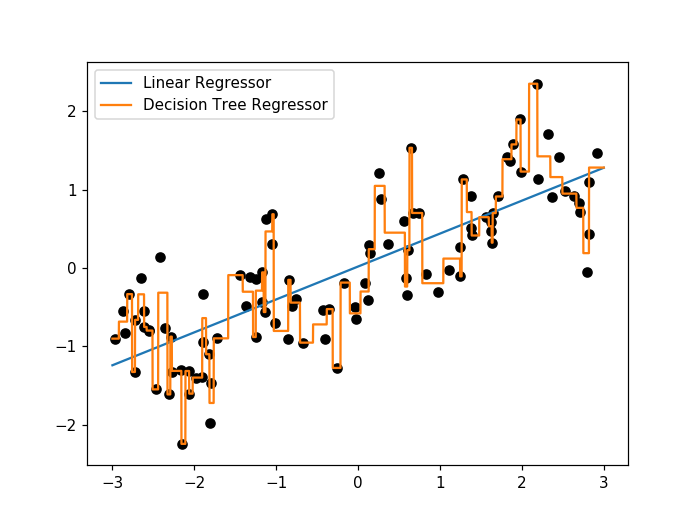

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=100)

line = np.linspace(-3,3,10000,endpoint=False).reshape(-1,1)
plt.figure()
reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),label='Linear Regressor')

reg =DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line),label = 'Decision Tree Regressor')
plt.scatter(X,y,c='k')
plt.legend();

## Making Linear model powerful

In [7]:
bins = np.linspace(-3,3,11)
which_bin = np.digitize(X,bins=bins)

<IPython.core.display.Javascript object>


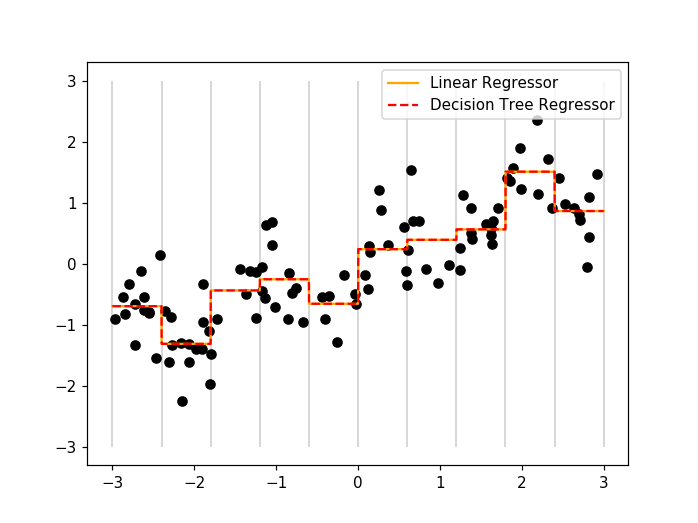

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)
X_binned = encoder.fit_transform(which_bin)
plt.figure()
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg =LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),c='orange',label='Linear Regressor',)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),'r--',label='Decision Tree Regressor')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.scatter(X[:,0],y,c='k')
plt.legend()

In [9]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


<IPython.core.display.Javascript object>


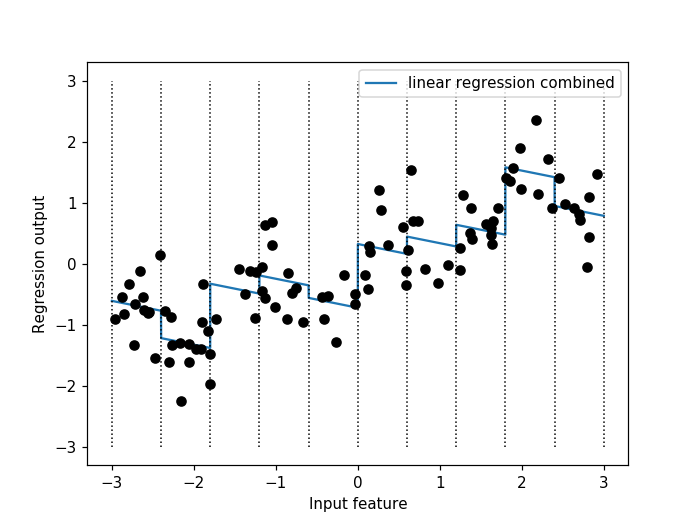

In [10]:
reg = LinearRegression().fit(X_combined, y)

plt.figure()
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [11]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


<IPython.core.display.Javascript object>


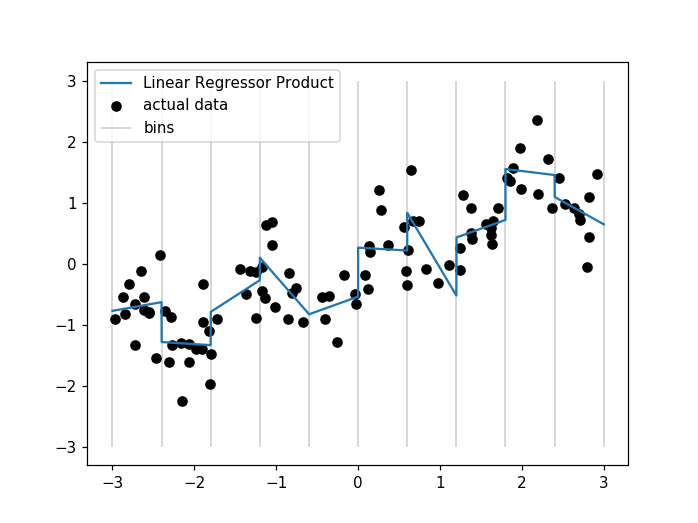

In [12]:
reg  = LinearRegression().fit(X_product,y)

plt.figure()
line_product = np.hstack([line_binned,line*line_binned])

plt.plot(line,reg.predict(line_product),label='Linear Regressor Product')
plt.scatter(X[:,0],y,c='k',label='actual data');
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2,label='bins')
plt.legend();

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly =PolynomialFeatures(degree =10,include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [14]:
X_poly.shape

(100, 10)

<IPython.core.display.Javascript object>


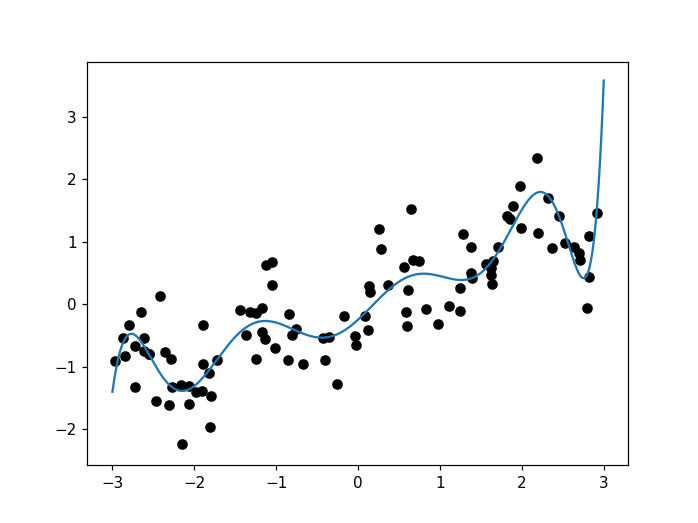

In [15]:
reg = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)

plt.figure()
plt.plot(line,reg.predict(line_poly),label ='Polynomail Linear Regressor')
plt.scatter(X[:,0],y,c='k',label='Data Points')

<IPython.core.display.Javascript object>


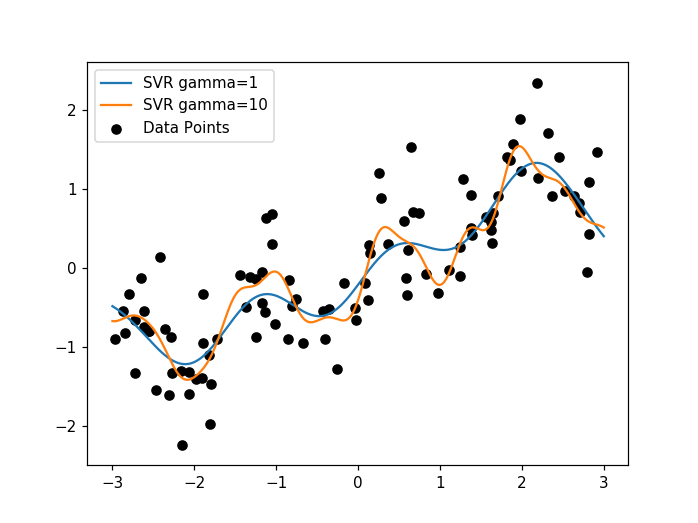

In [16]:
from sklearn.svm import SVR
plt.figure()
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.scatter(X[:,0],y,c='k',label='Data Points')
plt.legend();

In [17]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
boston = load_boston()
X_train,X_test,y_train,y_test  =train_test_split(boston.data,boston.target,random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly =poly.transform( X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [19]:
from sklearn.linear_model import Ridge
ridge =Ridge().fit(X_train_scaled,y_train)
print('WIthout poly Score {:.4f}'.format(ridge.score(X_test_scaled,y_test)))
ridge =Ridge().fit(X_train_poly,y_train)
print('WIth poly Score {:.4f}'.format(ridge.score(X_test_poly,y_test)))


WIthout poly Score 0.6214
WIth poly Score 0.7534


In [20]:
from sklearn.ensemble import RandomForestRegressor
rf =RandomForestRegressor(n_estimators = 100).fit(X_train_scaled,y_train)
print('WIthout poly Score {:.4f}'.format(rf.score(X_test_scaled,y_test)))
rf =RandomForestRegressor(n_estimators = 100).fit(X_train_poly,y_train)
print('WIth poly Score {:.4f}'.format(rf.score(X_test_poly,y_test)))


WIthout poly Score 0.8000
WIth poly Score 0.7803


## Univarirate Non Linear Transformations

In [21]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

<IPython.core.display.Javascript object>


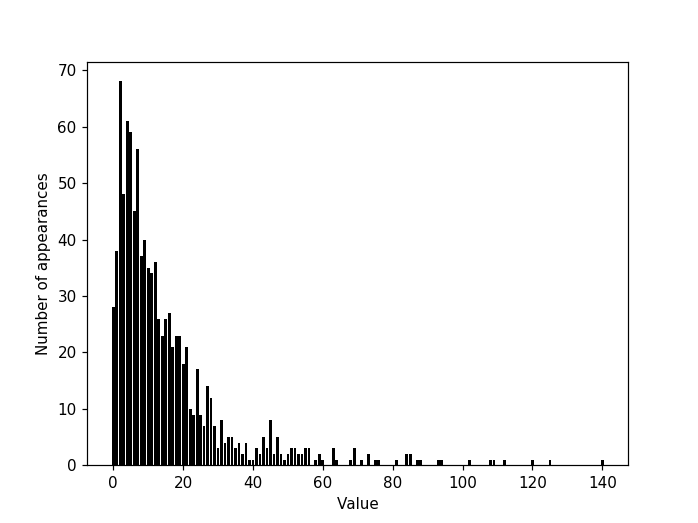

In [22]:
plt.figure()
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='k')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [23]:
from sklearn.linear_model import Ridge

X_train,X_test,y_train,y_test = train_test_split(X,y)
ridge = Ridge().fit(X_train,y_train)
print('Test Score{:.4f}'.format(ridge.score(X_test,y_test)))

Test Score0.6227


In [24]:
X_train_log = np.log(X_train+1)
X_test_log= np.log(X_test+1)

In [25]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_log,y_train)
print('Test Score{:.4f}'.format(ridge.score(X_test_log,y_test)))

Test Score0.8625


## Automatic Feature Selection

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
cancer = load_breast_cancer()
rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data),50))

X_w_noise = np.hstack([cancer.data,noise])
X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,
                                                random_state=0,test_size =.5)

select = SelectPercentile(percentile=50)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


<IPython.core.display.Javascript object>


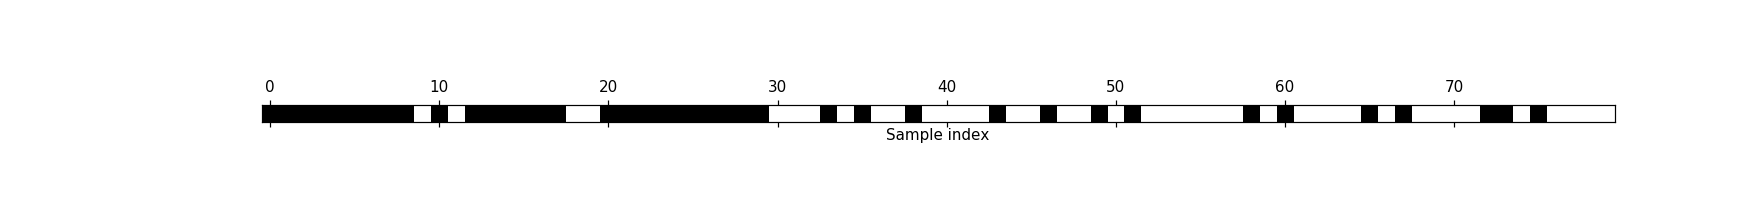

([], <a list of 0 Text yticklabel objects>)

In [27]:
mask= select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [28]:
from sklearn.linear_model import LogisticRegression
X_test_selected = select.transform(X_test)

lr= LogisticRegression().fit(X_train,y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


## Model based Feature Selection

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select =SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold='median')

In [30]:
select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 40)


<IPython.core.display.Javascript object>


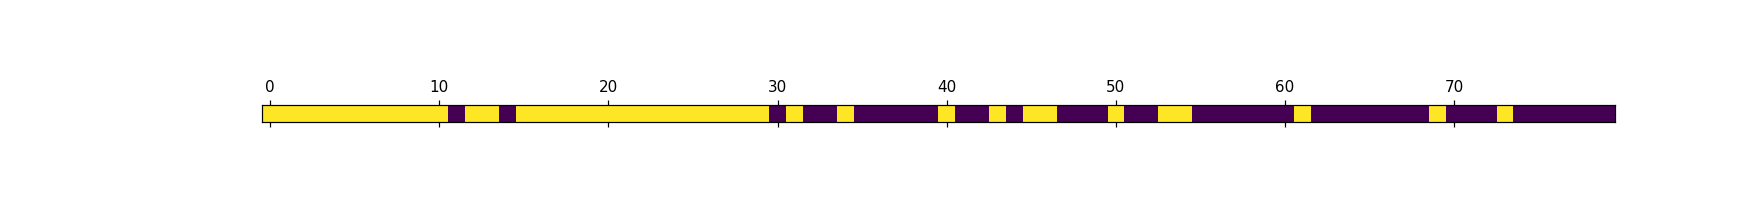

([], <a list of 0 Text yticklabel objects>)

In [31]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1))
plt.yticks(())


In [32]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1,y_train).score(X_test_l1,y_test)
print('Test Score {:.3f}'.format(score) )

Test Score 0.951


## Iterative Feature Selection

<IPython.core.display.Javascript object>


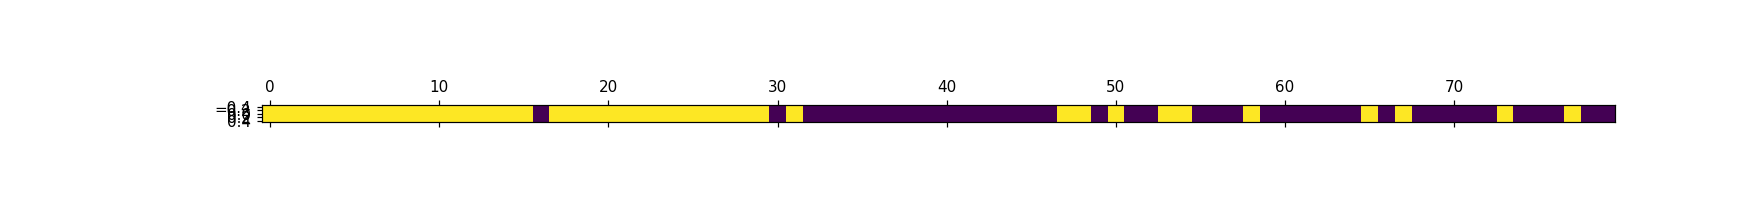

In [33]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100,random_state =42),
            n_features_to_select=40)

select.fit(X_train,y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1,-1))

In [34]:
X_train_rfe =select.transform(X_train)
X_test_rfe = select.transform(X_test)

score =LogisticRegression().fit(X_train_rfe,y_train).score(X_test_rfe,y_test)
score

0.9508771929824561

## Utilizing Expert Knowledge

In [35]:
citibike=mglearn.datasets.load_citibike()

<IPython.core.display.Javascript object>


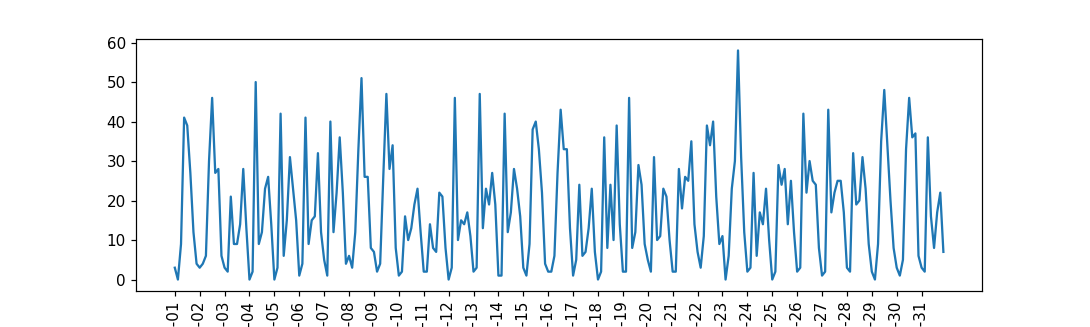

In [36]:
plt.figure(figsize =(10,3))
xticks = pd.date_range(start=citibike.index.min(),end=citibike.index.max(),freq='D')
plt.xticks(xticks,xticks.strftime('%a %m-%d'),rotation=90)
plt.plot(citibike)

In [37]:
y= citibike.values
X =citibike.index.astype('int64').values.reshape(-1,1)/10**9

In [38]:
n_train = 184
def eval_on_features(features,target,regressor):
    X_train,X_test=features[:n_train],features[n_train:]
    y_train,y_test=target[:n_train],target[n_train:]
    regressor.fit(X_train,y_train)
    print('Test score {:.3f}'.format(regressor.score(X_test,y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test score -0.035


<IPython.core.display.Javascript object>


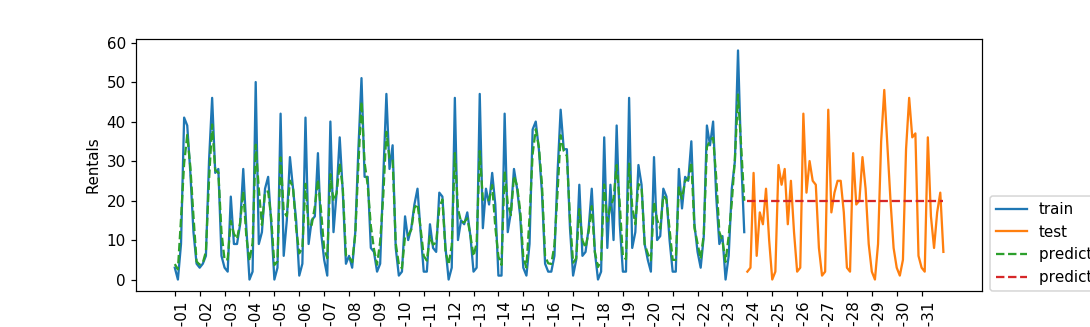

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
eval_on_features(X,y,regressor)

Test score 0.600


<IPython.core.display.Javascript object>


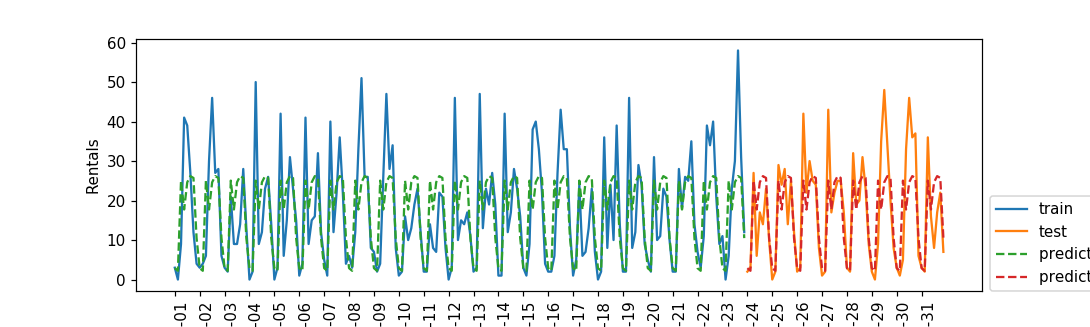

In [40]:
X_hour =citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour,y,regressor)

Test score 0.842


<IPython.core.display.Javascript object>


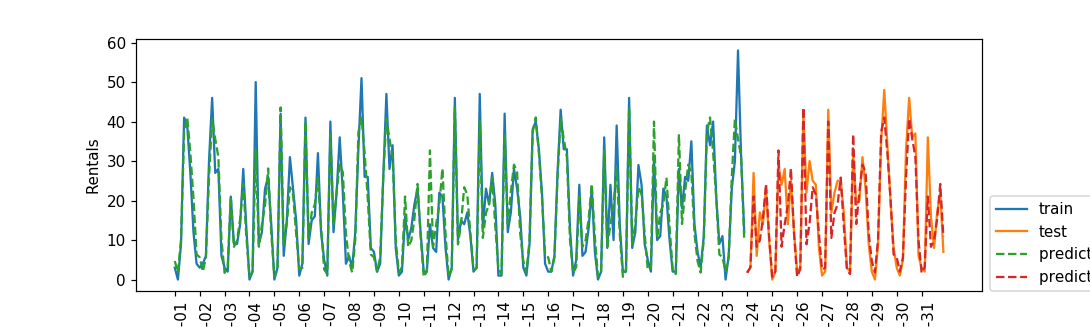

In [41]:
X_hour_week =np.hstack([citibike.index.dayofweek.values.reshape(-1,1),citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week,y,regressor)

Test score 0.132


<IPython.core.display.Javascript object>


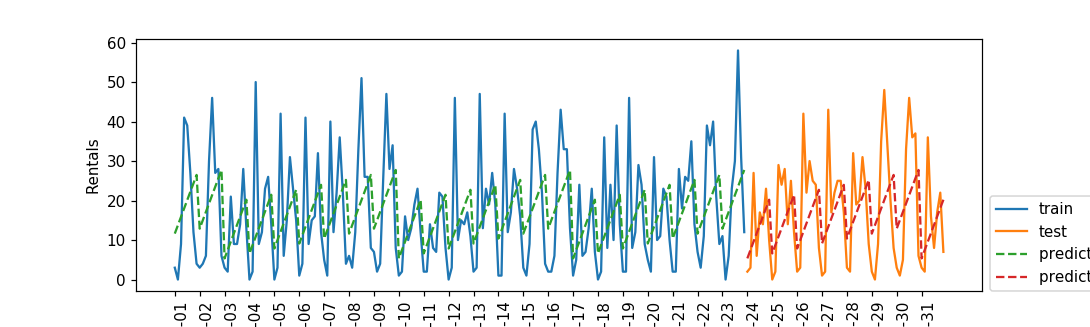

In [42]:
from sklearn.linear_model  import LinearRegression
eval_on_features(X_hour_week,y,LinearRegression())

In [43]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test score 0.619


<IPython.core.display.Javascript object>


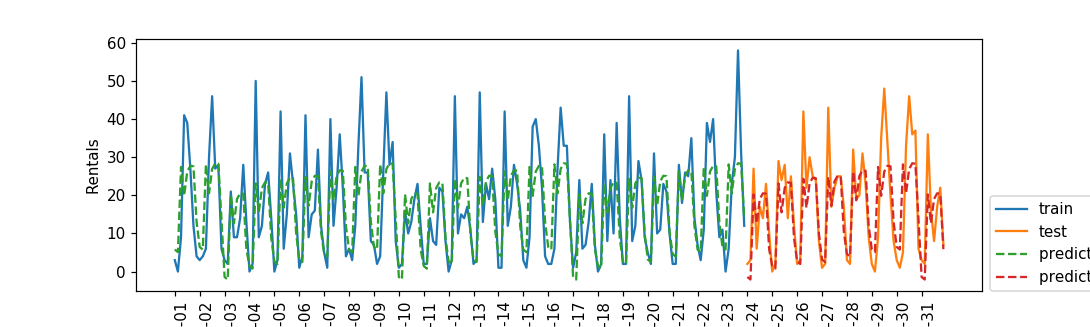

In [44]:
eval_on_features(X_hour_week_onehot, y, Ridge())

Test score 0.845


<IPython.core.display.Javascript object>


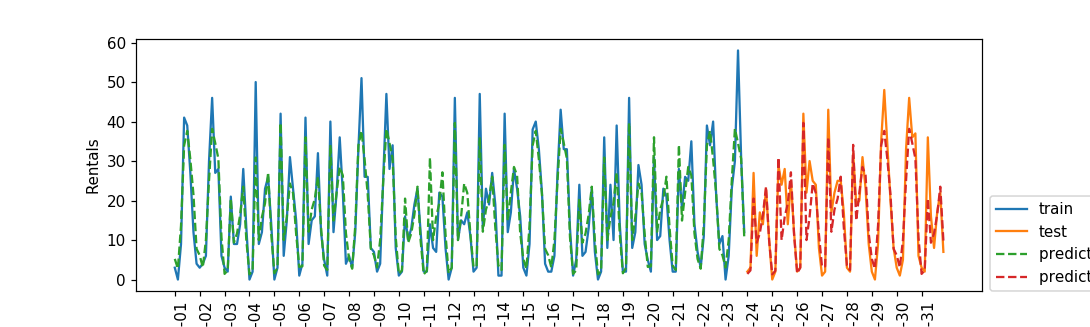

In [45]:
poly_transformer=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
X_hour_week_onehot_poly =poly_transformer.fit_transform(X_hour_week_onehot)

eval_on_features(X_hour_week_onehot_poly,y,Ridge())

## Evaluation metrics and scoring


In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
X= digits.data
y = digits.target==9

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =0)

In [47]:
from sklearn.dummy import DummyClassifier
dclf = DummyClassifier(strategy ='most_frequent').fit(X_train,y_train)
pred_most_frequent = dclf.predict(X_test)
print('Test Accuracy',dclf.score(X_test,y_test))

Test Accuracy 0.895555555556


In [48]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)

print('Test accuracy',tree.score(X_test,y_test))

Test accuracy 0.917777777778


In [49]:
from sklearn.dummy import DummyClassifier
dclf =DummyClassifier().fit(X_train,y_train)
print('Dummy Random accuracy',dclf.score(X_test,y_test))

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=.1).fit(X_train,y_train)
print('LOgistic REgression accuracy',logreg.score(X_test,y_test))

Dummy Random accuracy 0.815555555556
LOgistic REgression accuracy 0.977777777778


#### Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
pred_logreg=logreg.predict(X_test)
confusion = confusion_matrix(y_test,pred_logreg)
confusion

array([[401,   2],
       [  8,  39]])

<IPython.core.display.Javascript object>


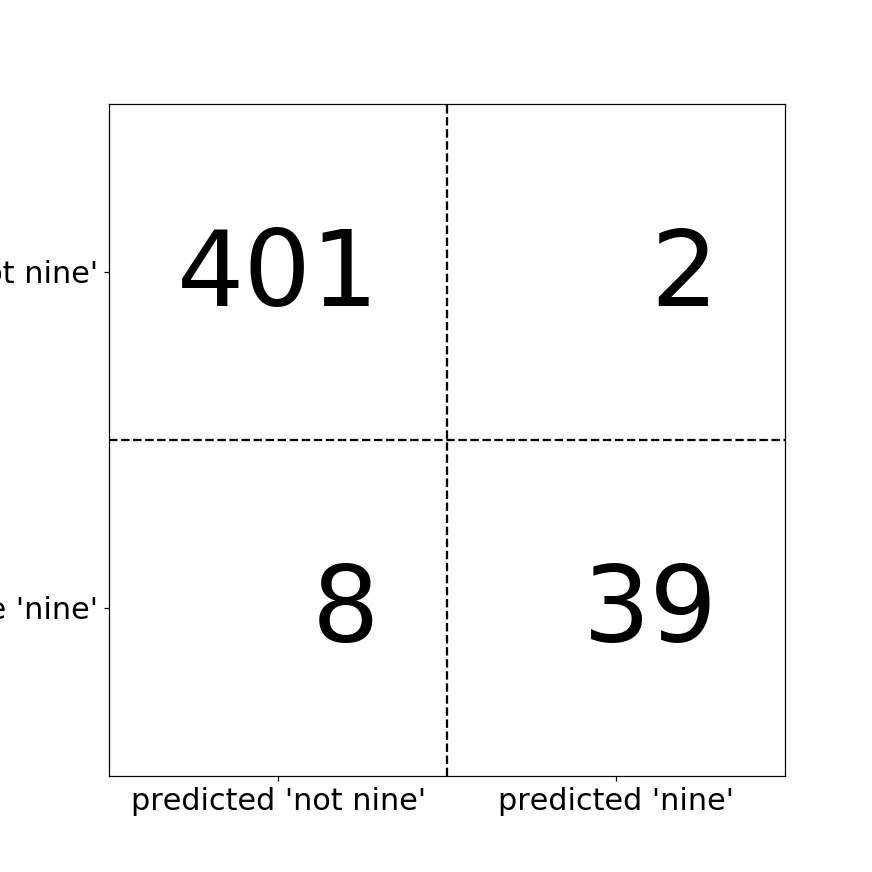

In [51]:
mglearn.plots.plot_confusion_matrix_illustration()

In [52]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,pred_most_frequent)
confusion

array([[403,   0],
       [ 47,   0]])

In [53]:
from sklearn.metrics import f1_score
print('F1 of most frequent',f1_score(y_test,pred_most_frequent))
print('F1 of Logistic Regression',f1_score(y_test,pred_logreg))

F1 of most frequent 0.0
F1 of Logistic Regression 0.886363636364


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_most_frequent,target_names=['!9','9']))

             precision    recall  f1-score   support

         !9       0.90      1.00      0.94       403
          9       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<IPython.core.display.Javascript object>


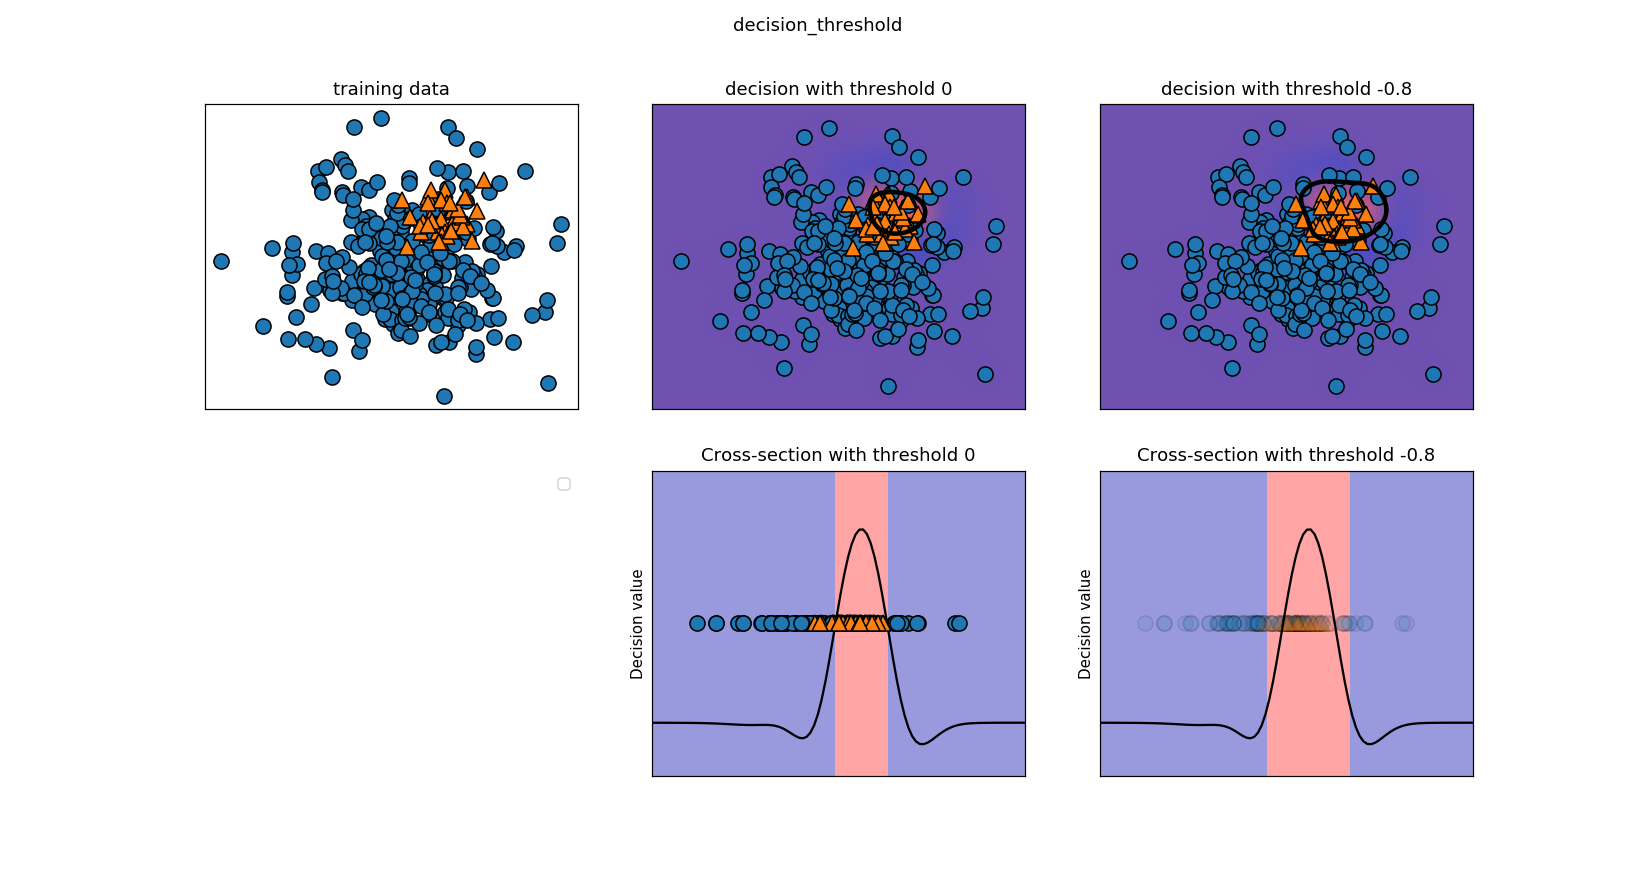

In [55]:
mglearn.plots.plot_decision_threshold()

In [68]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC
X,y = make_blobs(n_samples=(400,50),centers =2,cluster_std=[7,2],
                random_state=22)
X_train,X_test ,y_train,y_test = train_test_split(X,y,random_state=0)
svc = SVC(gamma=.05).fit(X_train,y_train)


In [69]:
print(classification_report(y_test,svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [80]:
y_pred_lower_threshold= (svc.decision_function(X_test) >-0.8)

In [81]:
print(classification_report(y_test,y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



## Precision - Recall curves

<IPython.core.display.Javascript object>


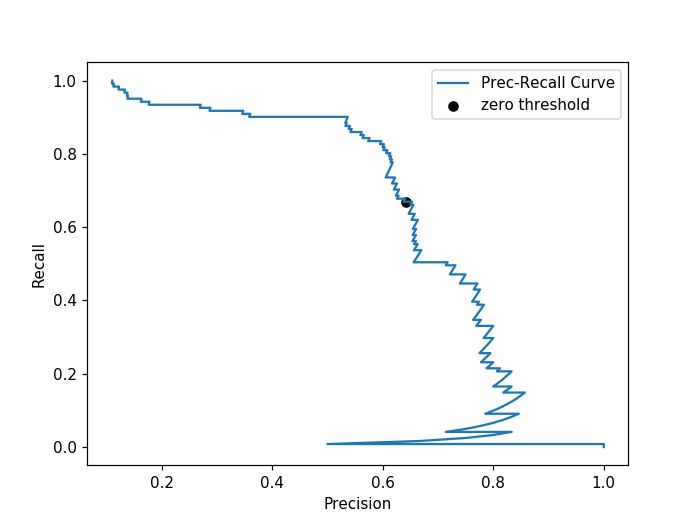

In [90]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
X,y = make_blobs(n_samples=(4000,500),centers =2,cluster_std=[7,2],
                random_state=22)
X_train,X_test ,y_train,y_test = train_test_split(X,y,random_state=0)
svc = SVC(gamma=.05).fit(X_train,y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
plt.figure()
plt.plot(precision,recall,label='Prec-Recall Curve')
close_zero = np.argmin(np.abs(thresholds))
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.scatter(precision[close_zero],recall[close_zero],c='k',label='zero threshold')
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


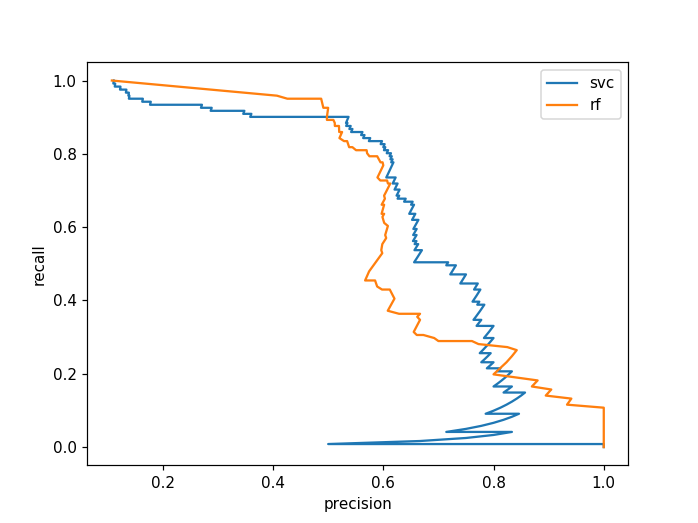

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=0,max_features=2)
rf.fit(X_train,y_train)

precision_rf,recall_rf,thresholds_rf = precision_recall_curve(y_test,rf.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(precision,recall,label='svc')
plt.plot(precision_rf,recall_rf,label='rf')
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend();

In [96]:
print('F1 score rf',f1_score(y_test,rf.predict(X_test)))
print('F1 score svc',f1_score(y_test,svc.predict(X_test)))

F1 score rf 0.609756097561
F1 score svc 0.655870445344


In [98]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test,rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test,svc.decision_function(X_test))
print(' Average Precison RF',ap_rf)
print(' Average Precision RF',ap_svc)

 Average Precison RF 0.665737171326
 Average Precision RF 0.662635797885


## ROC and AUC

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


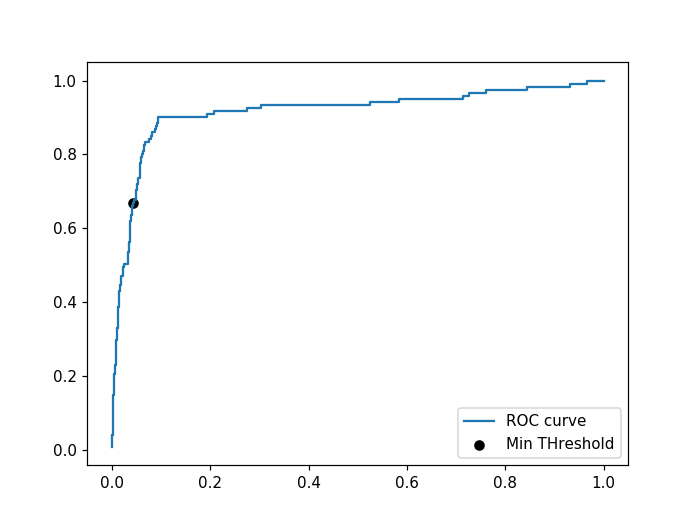

In [111]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,svc.decision_function(X_test))
plt.figure()
plt.plot(fpr,tpr,label='ROC curve')

close_zero = np.argmin(np.abs(thresholds))

plt.scatter(fpr[close_zero],tpr[close_zero],c='k',label='Min THreshold')
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


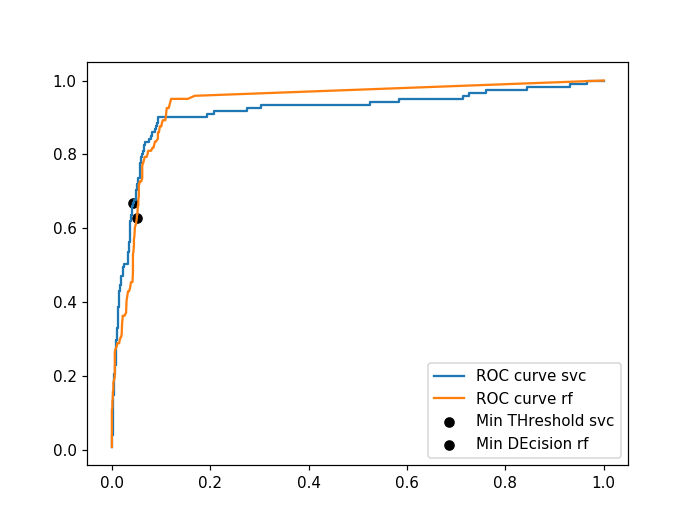

In [118]:
from sklearn.metrics import roc_curve
fpr_svc,tpr_svc,thresholds_svc = roc_curve(y_test,svc.decision_function(X_test))
plt.figure()
plt.plot(fpr_svc,tpr_svc,label='ROC curve svc')

close_zero_svc = np.argmin(np.abs(thresholds_svc))

plt.scatter(fpr_svc[close_zero_svc],tpr_svc[close_zero_svc],c='k',label='Min THreshold svc')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(fpr_rf,tpr_rf,label='ROC curve rf')
plt.scatter(fpr_rf[close_default_rf],tpr_rf[close_default_rf],c='k',label='Min DEcision rf')
plt.legend();


In [120]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
svc_auc =roc_auc_score(y_test,svc.decision_function(X_test))
print('Rf AUC',rf_auc)
print('SVM AUC',svc_auc)

Rf AUC 0.936695367291
SVM AUC 0.916293503671


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


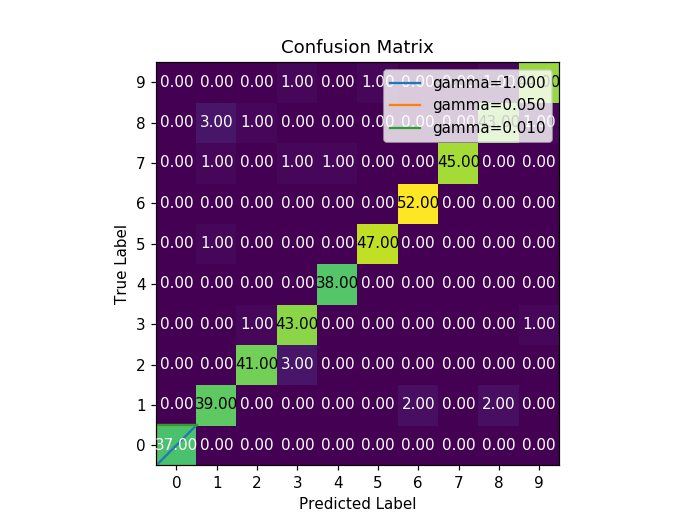

gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


In [126]:
y=digits.target==9

X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=0)
plt.figure()

for gamma in[1,0.05,0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
    	gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.legend();

## Multiclass metrics

In [140]:
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,random_state=0)
lr = LogisticRegression().fit(X_train,y_train)
pred = lr.predict(X_test)
print('Accuracy',accuracy_score(y_test,pred))
print('Confusion Matrix\n',confusion_matrix(y_test,pred))

Accuracy 0.953333333333
Confusion Matrix
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


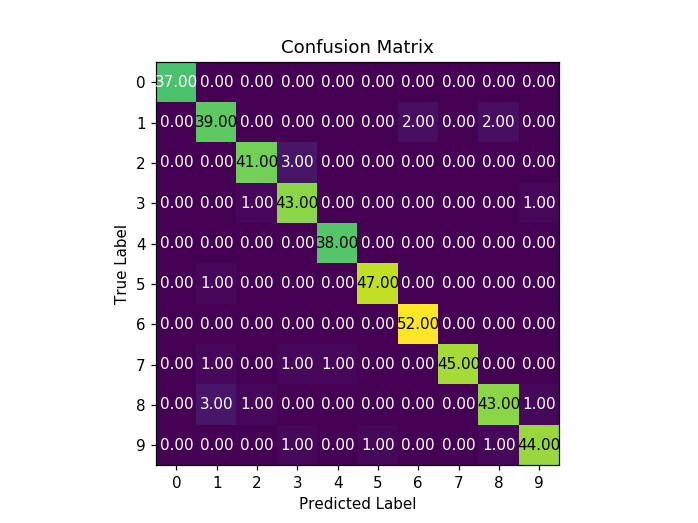

In [146]:
plt.figure()
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test,pred),xlabel='Predicted Label',
                                    ylabel='True Label',xticklabels=digits.target_names,
                                    yticklabels=digits.target_names)
plt.title('Confusion Matrix')
plt.gca().invert_yaxis()

In [147]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



  ## Evaluation Metrics in Model Selection

In [153]:
from sklearn.model_selection import cross_val_score
print('Default Scoring {}'.format(cross_val_score(SVC(),digits.data,digits.target==9)))
print('Accuracy Scoring {}'.format(cross_val_score(SVC(),digits.data,digits.target==9,scoring='accuracy')))
print('Default Scoring {}'.format(cross_val_score(SVC(),digits.data,digits.target==9,scoring='roc_auc')))


Default Scoring [ 0.89983306  0.89983306  0.89983306]
Accuracy Scoring [ 0.89983306  0.89983306  0.89983306]
Default Scoring [ 0.99372294  0.98957947  0.99594929]


In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print('DEFAULT ACCURACY')
print('Best PARAMTERS',grid.best_params_)
print('Default accuracy',grid.best_score_)
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set Accuracy: {:.3f}".format(
    grid.score(X_test, y_test)))

DEFAULT ACCURACY
Best PARAMTERS {'gamma': 0.0001}
Default accuracy 0.970304380104
Test set AUC: 0.992
Test set Accuracy: 0.973


In [164]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid,scoring='roc_auc')
grid.fit(X_train, y_train)
print(' ROC_AUC')
print('Best PARAMTERS',grid.best_params_)
print('Default accuracy',grid.best_score_)
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set Accuracy: {:.3f}".format(
    grid.score(X_test, y_test)))

 ROC_AUC
Best PARAMTERS {'gamma': 0.01}
Default accuracy 0.997467845028
Test set AUC: 1.000
Test set Accuracy: 1.000
